Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


C:\Users\shaff\AppData\Local\Temp\ipykernel_10176\728628647.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_data, steps_per_epoch=8, epochs=e,


Epoch 1/20
8/8 [==============================] - 37s 4s/step - loss: 1.4418 - accuracy: 0.5135 - val_loss: 0.6931 - val_accuracy: 0.5000


C:\Users\shaff\AppData\Local\Temp\ipykernel_10176\728628647.py:52: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(training_data)
C:\Users\shaff\AppData\Local\Temp\ipykernel_10176\728628647.py:53: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_data)


1/1 [==============================] - 0s 62ms/step


<Axes: >

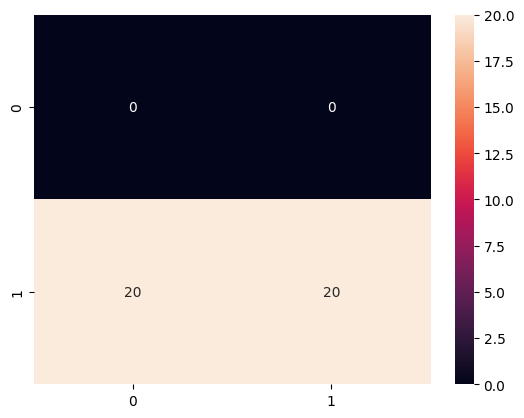

In [5]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import cv2
import os
import seaborn as sns
from tensorflow.keras.models import load_model

# Model Definition
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

# Data Loading
train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, horizontal_flip=True, zoom_range=0.2)
val_datagen = image.ImageDataGenerator(rescale=1./255)

training_data = train_datagen.flow_from_directory('../data/covid19/train', target_size=(224,224),
                                                  class_mode='binary', batch_size=32)

val_data = val_datagen.flow_from_directory('../data/covid19/val', target_size=(224,224),
                                           class_mode='binary', batch_size=32)

# Model Training
e = 20
hist = model.fit_generator(training_data, steps_per_epoch=8, epochs=e,
                           validation_data=val_data, validation_steps=2)

# Model Save
model.save('../models/covid19_model.h5')

# Model Evaluation
model.evaluate_generator(training_data)
model.evaluate_generator(val_data)

# Confusion Matrix
TP, TN, FP, FN = 0, 0, 0, 0
covid_images = os.listdir('../data/covid19/val/covid')
normal_images = os.listdir('../data/covid19/val/normal')

for i in covid_images:
    img = cv2.imread('../data/covid19/val/covid/'+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img / 255.0
    pred = model.predict(img)
    if pred < 0.5:
        TP += 1
    else:
        FN += 1

for i in normal_images:
    img = cv2.imread('../data/covid19/val/normal/'+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img / 255.0
    pred = model.predict(img)
    if pred > 0.5:
        TN += 1
    else:
        FP += 1

sns.heatmap([[TP, FP], [FN, TN]], annot=True)
